In [1]:
from os.path import abspath
from pypot.creatures import PoppyTorso

scene_path = abspath('./vrep-sensors/torso_sensors_scene.ttt')
config_path = abspath('./vrep-sensors/torso_vrep_sensors_config.json')
poppy = PoppyTorso(simulator='vrep', scene=scene_path, config=config_path)

In [2]:
# list of loaded sensors
[sensor.name for sensor in poppy.sensors]

[u'Vision_sensor', u'Proximity_sensor', u'floating_camera']

Populating the interactive namespace from numpy and matplotlib
FPS: 2
Resolution: 256x256


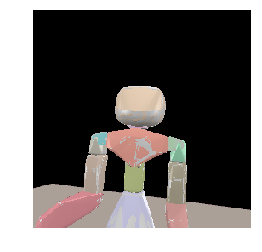

In [3]:
#using a floating vision sensor (floating_camera)
%pylab inline 
# Display the frame from floating_camera
axis('off')
imshow(poppy.floating_camera.frame)

print "FPS: " + str(poppy.floating_camera.fps)
res_x, res_y = poppy.floating_camera.resolution
print "Resolution: " + str(res_x) + "x" + str(res_y)

Populating the interactive namespace from numpy and matplotlib
FPS: 1
Resolution: 512x512


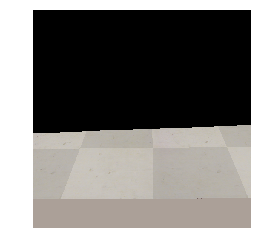

In [4]:
#using a vision sensor on Poppy's head(Vision_sensor)
%pylab inline 
# Display the frame from Vision_sensor
axis('off')
imshow(poppy.Vision_sensor.frame)

print "FPS: " + str(poppy.Vision_sensor.fps)
res_x, res_y = poppy.Vision_sensor.resolution
print "Resolution: " + str(res_x) + "x" + str(res_y)

In [5]:
# reading the proximity sensor
(is_object_in_range,
 detected_point,
 detected_object_handle,
 detected_surface_normal_vector) = poppy.Proximity_sensor.scan()

print "Something detected: " + str(is_object_in_range)

Something detected: False


In [6]:
# move the arm to the detection range of the sensor
poppy.l_shoulder_y.goto_position(-80, 0.5, wait=True)
poppy.l_shoulder_x.goto_position(-10, 0.5, wait=True)
poppy.l_arm_z.goto_position(-20, 0.5, wait=True)
poppy.l_elbow_y.goto_position(40, 2, wait=True)

# reading the proximity sensor
(is_object_in_range,
 detected_point,
 detected_object_handle,
 detected_surface_normal_vector) = poppy.Proximity_sensor.scan()

print "Something detected: " + str(is_object_in_range)

Something detected: True


In [7]:
# stop the simulation and close all vrep connections
from pypot.vrep import close_all_connections
poppy.stop_simulation()
close_all_connections()